## 4. Text-to-Image with Stable Diffusion

### 4.1 Comfy-UI

ComfyUI is a powerful modular diffusion model GUI that allows users to easily create and run diffusion models.


### Step 1. Running the ComfyUI on the cluster
We have built a Docker image that contains all the necessary dependencies to run ComfyUI. To run ComfyUI, follow the steps below:

1. Copy and create a new configuation file based on https://github.com/iiisthu/ailab/blob/main/user/comfyui-template.yaml .  You should set your namespace in the configure file, and use harbor-local.ai.iiis.co/llm-course/comfyui:v1 as the Docker image (already set in the template).

2. Helm install, just as other labs.

3. In order to access the website your started in the cluster, you should run the following command to forward the port to your local computer.  (you can also do it with the Kubernetes plugin in VSCode).  
```bash
# on your local PC
kubectl port-forward pod/<pod_name> 8188:8188
```

4. Opne a brower and visit https://127.0.0.1:8188 , you should see your UI.  


### Step 2. Playing with the comfy UI.
![ComfyUI Interface](assets/preview.png)
1. Import workflow configuration file. Click the `Workflow` button and select the workflow configuration file stored in **your PC**. We provide some example configs in `LLM-applications-course/lec5/comfy_example_workflows`. You can download to your PC and import them.
![Example Workflow Configuration File](assets/select.png)

2. Select models. You can enlarge the page to see the workflow more clearly. Here we can see in this workflow, the `Load Checkpoint` module requires the `ckpt_name` should be one of sdv3/2b_1024/sd3_medium.safetensors. For example, we select sd3_medium.safetensors.

3. Write your text prompt in `CLIP Text Encode` module. `Prompt` is what we want, `Negative Prompt` is what we don't want. 

4. (Optional) Change the `Seed` to `randomize` generate different results.

5. (Optional) Customize your workflow, e.g., add a lora module.

6. Click `Queue` to run the workflow.



In [ ]:
#### your task ####
# write down your prompts here

##### A autonomus car is driving through a crowed traffic area during night hours

# and copy the generated image below

##### Generated picture shown below:

# if you have a different workflow from the above (either you write your own, or you find on the Internet)
# please submit it together with this notebook

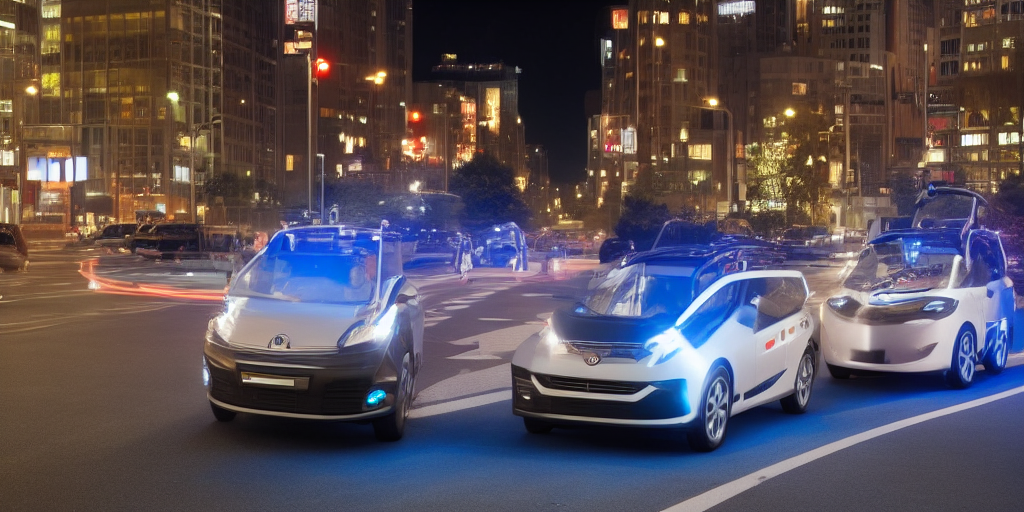

### 4.2 Training Stable Diffusion with WebUI

stable-diffusion-webui is a web interface for Stable Diffusion. Here we provide a tutorial on how to train Stable Diffusion using the web interface.

#### Step 1. Running the Stable Diffusion WebUI on the cluster
We have built a Docker image that contains all the necessary dependencies to run sd-WebUI. To run sd-WebUI, follow the steps below:

Follow a similar procedure to start the webUI, using webui-template.yaml. 
This time, please forward port 7860 instead. 

You should be able to access the GUI at https://127.0.0.1:7860  (from your pc)

#### Step 2. Playing with SD-WebUI
Pay attention to all paths in pictures below. If a path starts with "/share", you should replace it with "/ssdshare/share", e.g., "/share/lab5/clip-vit-l-14" -> "/ssdshare/share/lab5/clip-vit-l-14".

We want to teach the model a `concept` of `headless_statue`.
![Headless Statue](assets/sd-hdst.jpeg)

1. Select a sd model from the dropdown list.
![Select Model](assets/sd-ckpt.png)

2. Try to generate images using prompt: "An oil painting of headless_statue". We are not satisfied with the generated images.
![Generate Images](assets/sd-base.png)

3. Preprocess our `headless_statue` images. Set parameters following images below, and click `Generate` button.
![Preprocess Images](assets/sd-preprocess.png)

4. Create embedding for our concept `headless_statue`. 

- Name: filename for the created embedding. You will also use this text in prompts when referring to the embedding.

- Initialization text: the embedding you create will initially be filled with vectors of this text. If you create a one vector embedding named "zzzz1234" with "tree" as initialization text, and use it in prompt without training, then prompt "a zzzz1234 by monet" will produce same pictures as "a tree by monet".

- Number of vectors per token: the size of embedding. The larger this value, the more information about subject you can fit into the embedding, but also the more words it will take away from your prompt allowance. With stable diffusion, you have a limit of 75 tokens in the prompt. If you use an embedding with 16 vectors in a prompt, that will leave you with space for 75 - 16 = 59. Also from my experience, the larger the number of vectors, the more pictures you need to obtain good results.

![Create Embedding](assets/sd-create-emb.png)

5. Train the embedding. Set parameters following images below, and click `Train Embedding` button.
![Train Embedding](assets/sd-train.png)
![Sample](assets/sd-sample.png)

6. Generate images using prompt: "An oil painting of `Name`". We can see the generated images are more related to our concept `headless_statue`.
![Result](assets/sd-result.png)


### Textual Inversion
Textual Inversion is a parameter efficient method to train Stable Diffusion. This method can be used to represent a wide array of concepts. Trained on this method, Stable Diffusion can learn a pseudo-word that represents a specific artist or a new concept.
![Textual Inversion](assets/teaser.JPG)

#### Why we need Textual Inversion Algorithm?
Suppose we have a sd model (which is trained on a specific dataset without the image of `The Thinker`). When we want to use it to generate `A cat in the pose of The Thinker`, we need rewrite our prompt to `A cat with its hand on its chin, sitting on a rock, its eyes looking down thoughtfully`. This is because the model doesn't know what the exact pose of `The Thinker` is. Textual Inversion can help us to find the pseudo-word that represents the concept of `The Thinker` with 3-5 `The Thinker` images.

#### How does it work?
The essence of Textual Inversion is to map the object in the image to a pseudo-word(A high dimension vector actually. Not necessarily a natural language word, we barely use natural language word to tag it)
![Principal](assets/training.JPG)

#### Why not train embedding directly?
The scale of the embedding is $\frac{vocab\_ size}{token\_ vectors\_ num}$ times of the pseudo-word embedding in Textual Inversion, which requires far more data to train (Where vocab_size is the size of the vocabulary used in stable diffusion, and token_vectors_num is the number of token vectors we have to train in textual inversion).

训练前的生成效果：

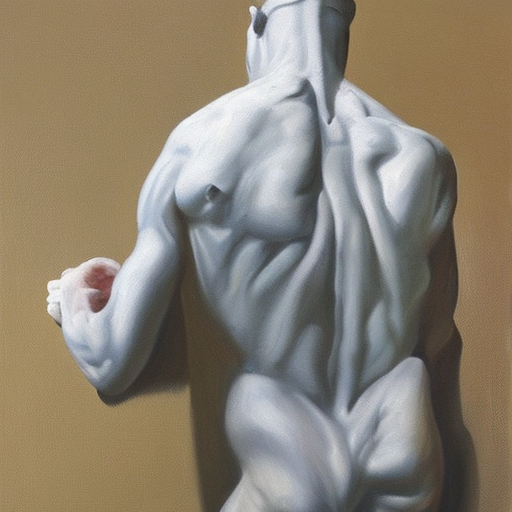

训练后的生产效果：

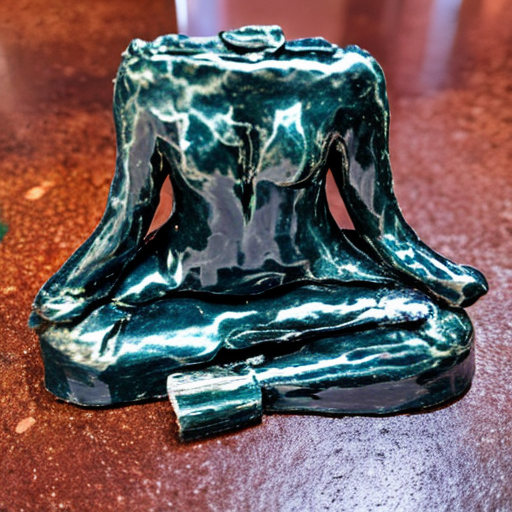
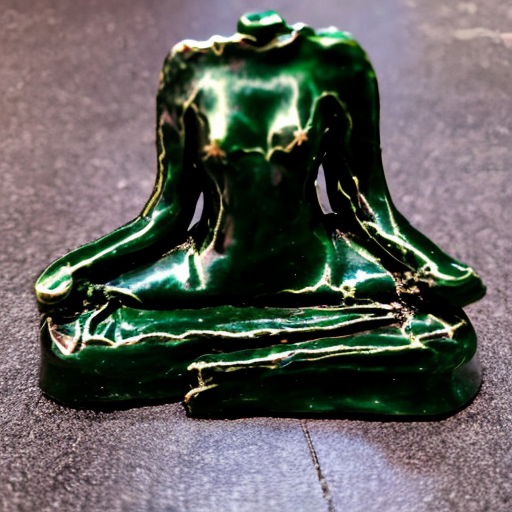